In [81]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [82]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from scipy.io import wavfile

In [83]:
# create the signal 
duration = 10  # seconds
wav_raw_data = wavfile.read("output/oppa_output.wav")
fs = wav_raw_data[0]  # sample frequency in Hz
signal = wav_raw_data[1] / 2 ** 15  # normalize to [-1, 1]
signal.shape

(11113200,)

In [84]:
# Split the signal into chunks
chunk_size = fs // 1  # 1 second chunks
num_chunks = len(signal) // chunk_size
print("num_chunks", num_chunks)
chunks = np.array(np.split(signal[:num_chunks * chunk_size], num_chunks))

num_chunks 252


In [85]:
pprint(chunks)
chunks.shape


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00473022,  0.00949097, ..., -0.00949097,
        -0.00473022,  0.        ],
       [ 0.        ,  0.00473022,  0.00949097, ..., -0.00949097,
        -0.00473022,  0.        ],
       ...,
       [-0.0272522 , -0.00286865,  0.01989746, ..., -0.02749634,
        -0.02172852, -0.01483154],
       [-0.00683594,  0.00598145,  0.01651001, ..., -0.03085327,
        -0.02255249, -0.01165771],
       [-0.00473022,  0.00354004,  0.01208496, ..., -0.00881958,
        -0.00970459, -0.01000977]])


(252, 44100)

In [86]:
# Compute the FFT for each chunk
fft_chunks = np.array([np.fft.fft(chunk) for chunk in chunks])
fft_chunks.shape

(252, 44100)

In [87]:
# Compute the frequencies for the x-axis
frequencies = np.fft.fftfreq(chunk_size, 1 / fs)
frequencies

array([ 0.,  1.,  2., ..., -3., -2., -1.])

In [88]:
# find the dominant frequency
dominant_frequencies = np.abs(fft_chunks)[0].argmax()
dominant_frequencies


0

(252, 22050)


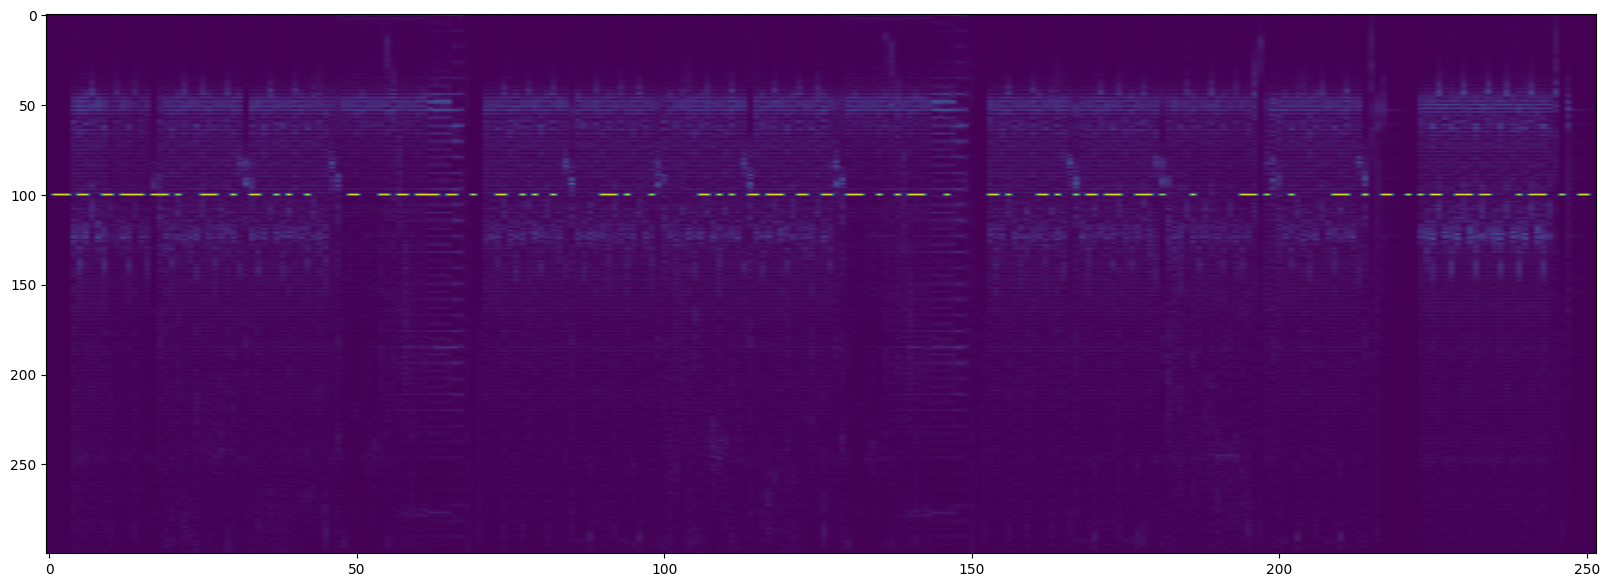

In [89]:
fft_mags = np.abs(fft_chunks)
fft_mags = np.array([fft_mag[:len(fft_mag) // 2] for fft_mag in fft_mags])
print(fft_mags.shape)
frequencies_chunk = frequencies[:len(frequencies) // 2]
fft_mags = fft_mags.T
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[0:300, :], aspect='auto')


# decode the code

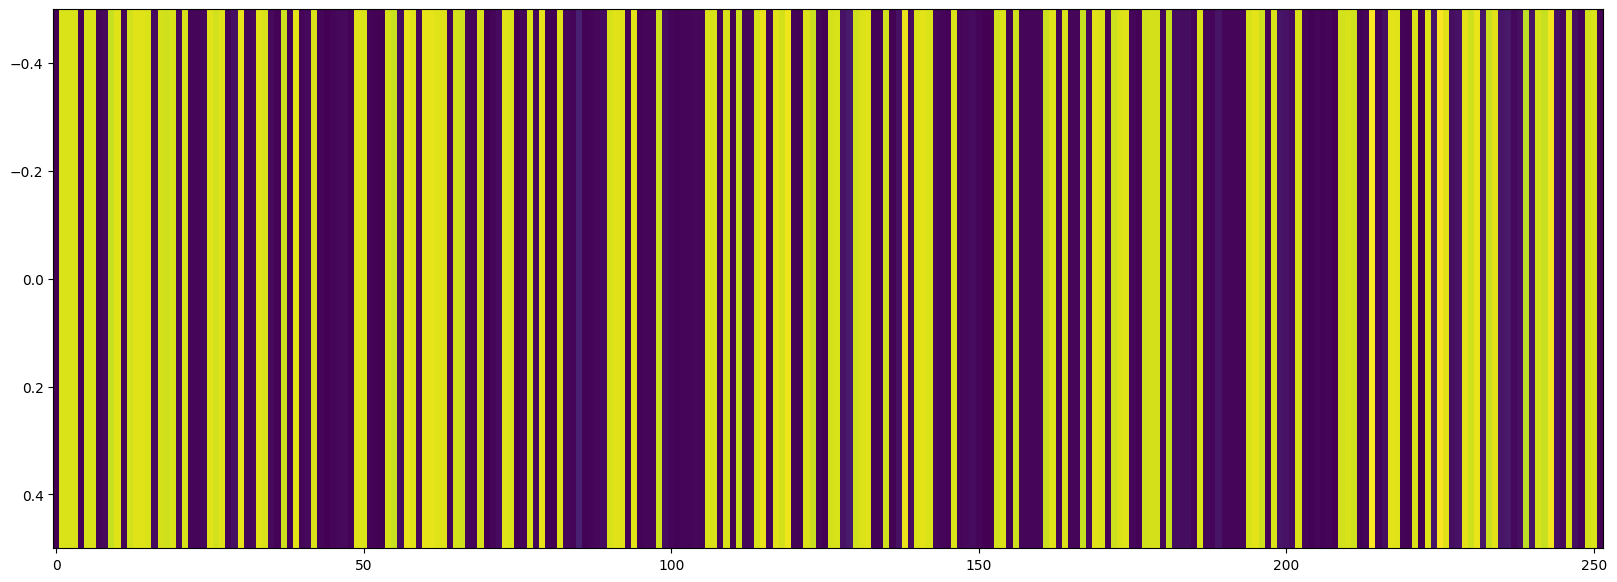

In [90]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[100:101, :300], aspect='auto')

In [91]:
fft_mags[100:101, :100]

array([[   0.        , 7349.36322778, 7349.36322778, 7349.37330854,
          90.67825748, 7313.77054894, 7368.06479732,  139.15085663,
         198.22128734, 7149.40622158, 7395.03776971,  116.57994432,
        7250.17757147, 7396.43696445, 7417.28116715, 7333.59143074,
         235.00754797, 7285.18017449, 7240.30116844, 7334.60613295,
         198.19591251, 7323.06651706,  143.10256858,  129.17552299,
         175.30641735, 7414.40245172, 7251.43076069, 7401.79301144,
          92.22556776,  324.32433378, 7523.51333355,  126.3503935 ,
         202.54668263, 7475.01179253, 7356.95303594,  193.36044505,
          76.62479228, 7201.75835657,   78.28622512, 7470.84320844,
         101.47533783,  160.51692546, 7373.15142547,  121.81298436,
          14.90300691,  144.88768345,  170.99774786,  197.76242073,
          37.24303546, 7445.37518538, 7348.47698878,   89.38304165,
          31.44851201,   25.86104021, 7331.24262317, 7121.3709359 ,
         243.44586797, 7563.61060282, 7432.43098

In [92]:
binary = np.where(fft_mags[100:101, :150 - (150 % 8)] > 1000, 1, 0)

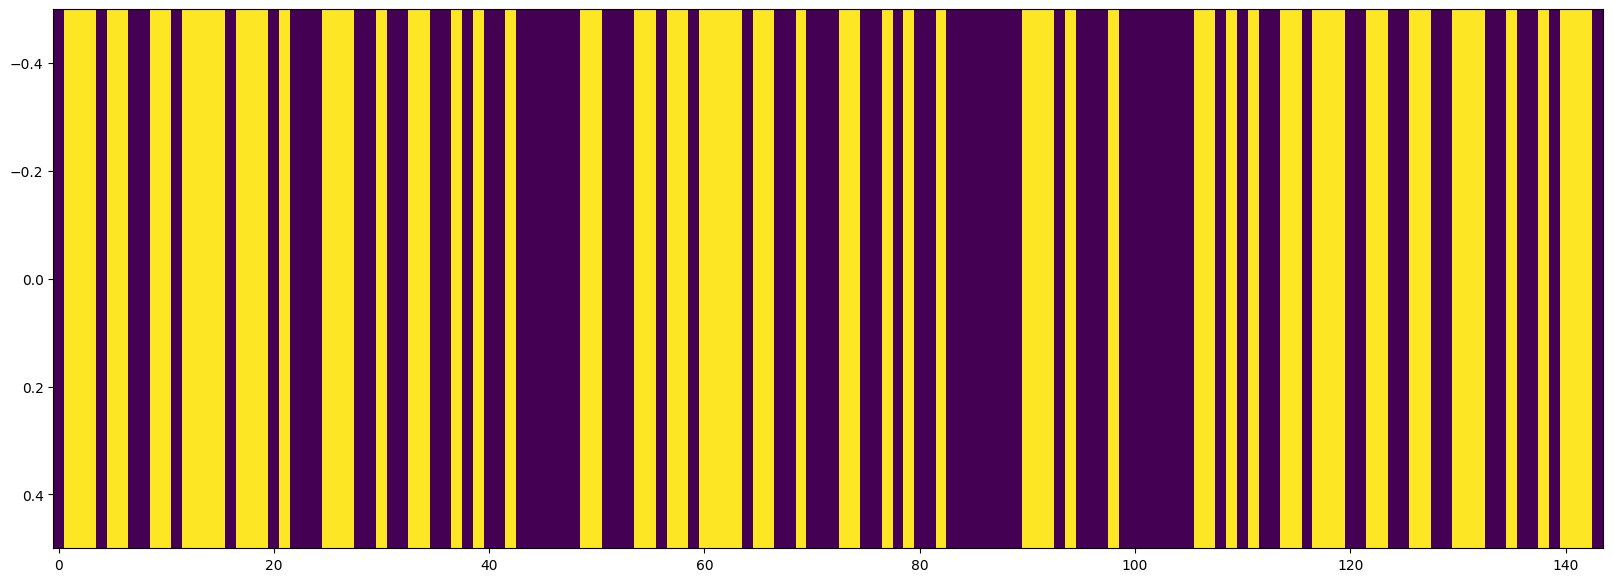

In [93]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(binary, aspect='auto')


In [94]:
binary = list(binary[0])
binary

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [95]:
binary = "".join([str(bit) for bit in binary])
binary

'011101100110111101110100011100100110010100100000011000110110111101100100011001010010000000111010001000000011010100110111001100110011100100101110'

In [96]:
message = ""
for i in range(len(binary) // 8):
    byte: str = binary[i * 8: (i + 1) * 8]
    message += chr(int(byte, 2))
message

'votre code : 5739.'

In [97]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |
 |  Built-in subclasses:
 |      bool
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __and__(self, value, /)
 |      Return self&value.
 |
 |  __bool__(self, /)
 |      True if self else False
